In [ ]:
# Setup
!git clone --branch=add-data https://github.com/schmidt-jake/kaggle.git
%cd kaggle
!pip install -U pip
!pip install pip-tools
!pip-sync mammography/requirements/main.in

In [ ]:
!nvidia-smi
!python -m torch.utils.collect_env

In [3]:
import pandas as pd


df = pd.read_csv("../../data/train.csv")

In [4]:
df.dtypes

site_id                      int64
patient_id                   int64
image_id                     int64
laterality                  object
view                        object
age                        float64
cancer                       int64
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                     object
machine_id                   int64
difficult_negative_case       bool
dtype: object

In [5]:
df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [1]:
import pydicom

img = pydicom.dcmread("/Users/Jake/Projects/kaggle/mammography/data/train_images/10038/1967300488.dcm")

In [2]:
img.pixel_array

array([[2675, 2595, 2575, ...,  265,  265,  263],
       [2570, 2614, 2591, ...,  257,  264,  267],
       [2639, 2627, 2625, ...,  263,  264,  267],
       ...,
       [ 354,  360,  359, ...,  270,  271,  273],
       [ 351,  366,  365, ...,  276,  269,  275],
       [ 352,  358,  357, ...,  274,  271,  275]], dtype=uint16)

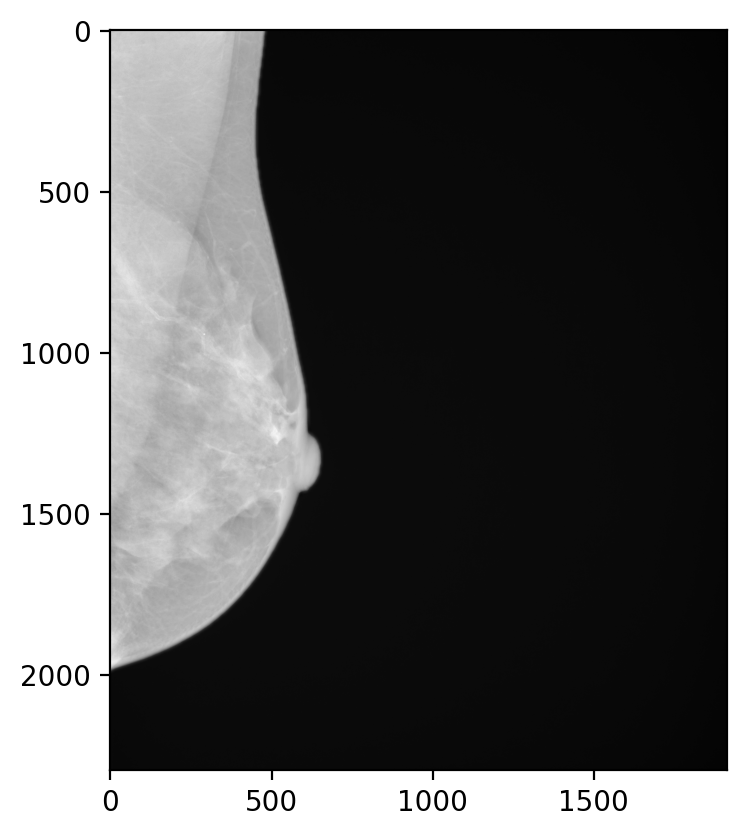

In [2]:
import matplotlib.pyplot as plt

plt.imshow(img.pixel_array, cmap="gray")

In [3]:
img.ImageLaterality

'L'

In [4]:
img.PhotometricInterpretation

'MONOCHROME2'